In [28]:
import glob as gl
import os

folder_objetivo = "andres-data-new"

# Obtenemos todos los folders de la carpeta objetivo con glob
folders = gl.glob(folder_objetivo + "/*")

real_folders = []
for folder in folders:
    if os.path.isdir(folder):
        real_folders.append(folder)
        
print(real_folders)



['andres-data-new\\thread_1', 'andres-data-new\\thread_12', 'andres-data-new\\thread_2', 'andres-data-new\\thread_3', 'andres-data-new\\thread_4', 'andres-data-new\\thread_6', 'andres-data-new\\thread_9']


In [29]:
# Para cada real folder, obtenemos los folders dentro

subfolders = []
for folder in real_folders:
    subfolders.append(gl.glob(folder + "/*"))
    
    
print(subfolders)

[['andres-data-new\\thread_1\\load_12500', 'andres-data-new\\thread_1\\load_25000', 'andres-data-new\\thread_1\\load_37500', 'andres-data-new\\thread_1\\load_50000', 'andres-data-new\\thread_1\\load_62500', 'andres-data-new\\thread_1\\load_75000', 'andres-data-new\\thread_1\\load_vs_events.png', 'andres-data-new\\thread_1\\load_vs_events_1t.png', 'andres-data-new\\thread_1\\load_vs_latency.png', 'andres-data-new\\thread_1\\load_vs_latency_1t.png', 'andres-data-new\\thread_1\\mean.csv', 'andres-data-new\\thread_1\\merged.csv'], ['andres-data-new\\thread_12\\load_12500', 'andres-data-new\\thread_12\\load_25000', 'andres-data-new\\thread_12\\load_37500', 'andres-data-new\\thread_12\\load_50000', 'andres-data-new\\thread_12\\load_62500', 'andres-data-new\\thread_12\\load_75000', 'andres-data-new\\thread_12\\load_vs_events.png', 'andres-data-new\\thread_12\\load_vs_events_12t.png', 'andres-data-new\\thread_12\\load_vs_latency.png', 'andres-data-new\\thread_12\\load_vs_latency_12t.png', 'and

In [30]:
# Para cada subfolder, obtenemos los archivos dentro .csv
csv_files = []
for subfolder in subfolders:
    for folder in subfolder:
        # Si no contiene mean, o merged lo añadimos
        if "mean" not in folder and "merged" not in folder:
            csv_files.append(gl.glob(folder + "/*.csv"))
            

# Eliminamos vacios
csv_files = [x for x in csv_files if x != []]

print(csv_files)
        

[['andres-data-new\\thread_1\\load_12500\\_12500_1.csv', 'andres-data-new\\thread_1\\load_12500\\_12500_1_monitor.csv'], ['andres-data-new\\thread_1\\load_25000\\_25000_1.csv', 'andres-data-new\\thread_1\\load_25000\\_25000_1_monitor.csv'], ['andres-data-new\\thread_1\\load_37500\\_37500_1.csv', 'andres-data-new\\thread_1\\load_37500\\_37500_1_monitor.csv'], ['andres-data-new\\thread_1\\load_50000\\_50000_1.csv', 'andres-data-new\\thread_1\\load_50000\\_50000_1_monitor.csv'], ['andres-data-new\\thread_1\\load_62500\\_62500_1.csv', 'andres-data-new\\thread_1\\load_62500\\_62500_1_monitor.csv'], ['andres-data-new\\thread_1\\load_75000\\_75000_1.csv', 'andres-data-new\\thread_1\\load_75000\\_75000_1_monitor.csv'], ['andres-data-new\\thread_12\\load_12500\\_12500_12.csv', 'andres-data-new\\thread_12\\load_12500\\_12500_12_monitor.csv'], ['andres-data-new\\thread_12\\load_25000\\_25000_12.csv', 'andres-data-new\\thread_12\\load_25000\\_25000_12_monitor.csv'], ['andres-data-new\\thread_12\\l

In [31]:
# Hacemos pandas
import pandas as pd
import matplotlib.pyplot as plt

dataframes = []
for csv_file in csv_files:
    # Creamos una carpeta images en subfolder
    # Get the folder path by removing the filename part
    folder_name = os.path.dirname(csv_file[0])
    
    os.makedirs(os.path.join(folder_name, "images"), exist_ok=True)
    
    
    # Read the csv file without monitor in the name
    df = pd.read_csv(csv_file[0])
    print(df)
    
    # Obtenemos datos como el load, threads
    load = df["load"].values
    threads = df["threads"].values
    
    # Leemos ahora el csv 1
    df1 = pd.read_csv(csv_file[1])
    print(df1)
    
    # Hacemos un plot imagen de ID, %CPU (global)
    plt.plot(df1["ID"], df1["%CPU (global)"])
    plt.xlabel("ID")
    plt.ylabel("%CPU (global)")
    plt.title(f"%CPU (global) Load : {load[0]} Threads : {threads[0]}")
    
    plt.savefig(os.path.join(folder_name, "images", f"plot_cpu_{load[0]}_{threads[0]}.png"))
    plt.close()
    
    # Ahora una imagen de ID, Capacidad de memoria utilizada
    plt.plot(df1["ID"], df1["Capacidad de memoria utilizada"])
    plt.xlabel("ID")
    plt.ylabel("Capacidad de memoria utilizada")
    plt.title(f"Capacidad de memoria utilizada Load : {load[0]} Threads : {threads[0]}")
    
    plt.savefig(os.path.join(folder_name, "images", f"plot_mem_{load[0]}_{threads[0]}.png"))
    plt.close()
    
    # Finalmente con ID, % Memoria utilizada
    plt.plot(df1["ID"], df1["% Memoria utilizada"])
    plt.xlabel("ID")
    plt.ylabel("% Memoria utilizada")
    plt.title(f"% Memoria utilizada Load : {load[0]} Threads : {threads[0]}")
    
    plt.savefig(os.path.join(folder_name, "images", f"plot_mem_perc_{load[0]}_{threads[0]}.png"))
    plt.close()
    
    # Finalmente un csv con la media de %CPU, memoria y %Memoria utilizada
    df1["%CPU (global)"].mean()
    df1["% Memoria utilizada"].mean()
    df1["Capacidad de memoria utilizada"].mean()
    
    df_mean = pd.DataFrame({
        "Mean %CPU" : [df1["%CPU (global)"].mean()],
        "Mean % Memoria utilizada" : [df1["% Memoria utilizada"].mean()],
        "Mean Capacidad de memoria utilizada" : [df1["Capacidad de memoria utilizada"].mean()],
        "load" : [load[0]],
        "threads" : [threads[0]]
    })
    
    df_mean.to_csv(os.path.join(folder_name, "images", f"mean_{load[0]}_{threads[0]}.csv"))
    
    

                 timestamp   load  threads  total_threads  events_seconds  \
0  2025-03-22 13:49:26.174  12500        1             12         1276.67   

   total_time  latency_min  latency_avg  latency_max  latency_95th  \
0      9.7891         0.49         0.78         9.02          1.64   

   latency_sum  events_avg  events_stddev  execution_time_avg  \
0      9779.52     12500.0            0.0              9.7795   

   execution_time_stddev  
0                    0.0  
   ID            Timestamp  %CPU (global)  Capacidad de memoria utilizada  \
0   0  2025-03-22 13:49:16           10.7                         1090608   
1   1  2025-03-22 13:49:17            9.4                         1090872   
2   2  2025-03-22 13:49:18            9.7                         1090372   
3   3  2025-03-22 13:49:20            9.4                         1093352   
4   4  2025-03-22 13:49:21            9.5                         1093512   
5   5  2025-03-22 13:49:22           10.1                

In [32]:
# Fusionar todos los mean en un solo csv
mean_files = gl.glob(folder_objetivo + "/*/*/images/mean_*.csv")

df_mean = pd.DataFrame()
for mean_file in mean_files:
    df = pd.read_csv(mean_file)
    df_mean = pd.concat([df_mean, df])
    
df_mean.to_csv(os.path.join(folder_objetivo, "mean_all.csv"))

In [33]:
# Cogemos todos los csv bajo un folder del folder objetivo y fusionamos todos los csv que no tengan monitor en el nombre en un solo csv
for folder in real_folders:
    print(folder)
    csv_files = gl.glob(folder + "/*/*.csv")
    
    # Creamos un dataframe vacio
    df = pd.DataFrame()
    
    for csv_file in csv_files:
        if "monitor" not in csv_file:
            df = pd.concat([df, pd.read_csv(csv_file)])
        
    print(df)
    df.to_csv(os.path.join(folder, "merged.csv"), index=False)
    

andres-data-new\thread_1
                 timestamp   load  threads  total_threads  events_seconds  \
0  2025-03-22 13:49:26.174  12500        1             12         1276.67   
0  2025-03-22 13:50:00.251  25000        1             12          736.59   
0  2025-03-22 13:51:27.727  37500        1             12          429.15   
0  2025-03-22 13:54:35.307  50000        1             12          266.69   
0  2025-03-22 13:59:52.060  62500        1             12          197.43   
0  2025-03-22 14:07:26.750  75000        1             12          164.98   

   total_time  latency_min  latency_avg  latency_max  latency_95th  \
0      9.7891         0.49         0.78         9.02          1.64   
0     33.9387         0.90         1.36        12.67          1.64   
0     87.3812         2.24         2.33        11.84          2.71   
0    187.4809         2.72         3.75        19.88          5.77   
0    316.5729         3.51         5.06        24.19          7.56   
0    454.6047  

In [34]:
from scipy import stats

# Cogemos los merged.csv y hacemos un plot de load (eje x) y events_seconds (eje y)


for folder in real_folders:
    df = pd.read_csv(os.path.join(folder, "merged.csv"))
    print(df)
    
    # Create bar chart for load vs events_seconds
    plt.figure(figsize=(10, 6))
    plt.bar(df["load"], df["events_seconds"], width=5000)
    plt.xlabel("Load")
    plt.ylabel("Events seconds")
    plt.title(f"Load vs Events seconds for {df['threads'].iloc[0]} threads")
    
    plt.savefig(os.path.join(folder, "load_vs_events_" + str(df['threads'].iloc[0]) + "t.png"))
    plt.close()
    
    # Create bar chart for load vs latency_avg
    plt.figure(figsize=(10, 6))
    plt.bar(df["load"], df["latency_avg"], width=5000)
    plt.xlabel("Load")
    plt.ylabel("Latency avg")
    plt.title(f"Load vs Latency avg for {df['threads'].iloc[0]} threads")
    
    plt.savefig(os.path.join(folder, "load_vs_latency_" + str(df['threads'].iloc[0]) + "t.png"))
    plt.close()
    
    # Finalmente, haz la media armonica de events_second y el mean de latency_avg en una tabla y guardala como imagen
    df2 = pd.DataFrame()
    # Use harmonic mean for events_seconds
    df2["events_seconds"] = [stats.hmean(df["events_seconds"])]
    df2["latency_avg"] = [df["latency_avg"].mean()]
    df2["latency_min"] = [df["latency_min"].mean()]
    df2["latency_max"] = [df["latency_max"].mean()]
    df2["latency_95th"] = [df["latency_95th"].mean()]
    
    print(df2)
    df2.to_csv(os.path.join(folder, "mean.csv"), index=False)


                 timestamp   load  threads  total_threads  events_seconds  \
0  2025-03-22 13:49:26.174  12500        1             12         1276.67   
1  2025-03-22 13:50:00.251  25000        1             12          736.59   
2  2025-03-22 13:51:27.727  37500        1             12          429.15   
3  2025-03-22 13:54:35.307  50000        1             12          266.69   
4  2025-03-22 13:59:52.060  62500        1             12          197.43   
5  2025-03-22 14:07:26.750  75000        1             12          164.98   

   total_time  latency_min  latency_avg  latency_max  latency_95th  \
0      9.7891         0.49         0.78         9.02          1.64   
1     33.9387         0.90         1.36        12.67          1.64   
2     87.3812         2.24         2.33        11.84          2.71   
3    187.4809         2.72         3.75        19.88          5.77   
4    316.5729         3.51         5.06        24.19          7.56   
5    454.6047         5.82         6.06 

                 timestamp   load  threads  total_threads  events_seconds  \
0  2025-03-22 13:49:26.174  12500        1             12         1276.67   
1  2025-03-22 13:50:00.251  25000        1             12          736.59   
2  2025-03-22 13:51:27.727  37500        1             12          429.15   
3  2025-03-22 13:54:35.307  50000        1             12          266.69   
4  2025-03-22 13:59:52.060  62500        1             12          197.43   
5  2025-03-22 14:07:26.750  75000        1             12          164.98   
2  2025-03-22 14:08:29.164  37500        2             12          876.18   
1  2025-03-22 14:07:46.287  25000        2             12         1540.15   
0  2025-03-22 14:07:29.980  12500        2             12         3965.27   
5  2025-03-22 14:16:05.904  75000        2             12          329.97   
4  2025-03-22 14:12:18.531  62500        2             12          433.26   
3  2025-03-22 14:09:54.201  50000        2             12          588.54   

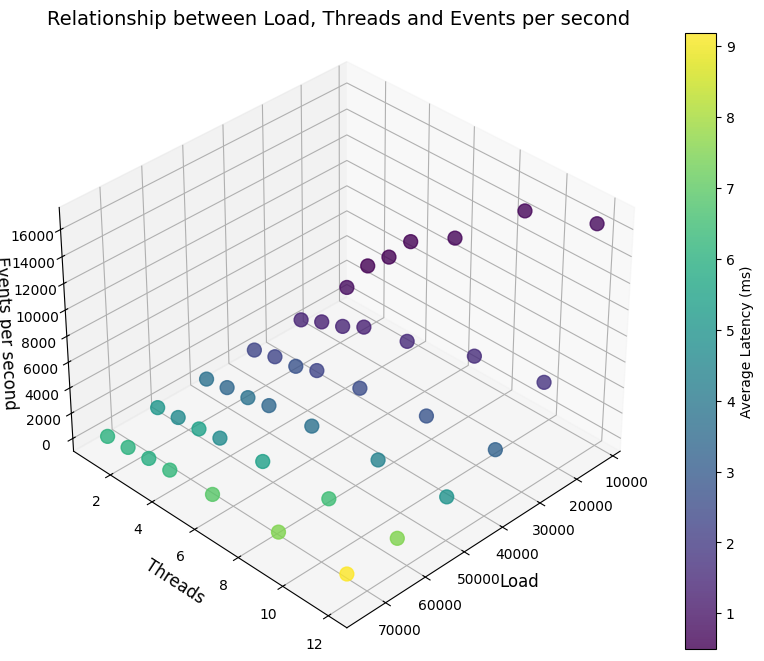

In [35]:
# Ahora fusionamos todos los merged.csv en un solo csv en la raiz de la carpeta objetivo
df = pd.DataFrame()
for folder in real_folders:
    df = pd.concat([df, pd.read_csv(os.path.join(folder, "merged.csv") )])
    
    
# Ordenalo por las columnas load y threads
df = df.sort_values(by=["threads"])
print(df)
    
df.to_csv(os.path.join(folder_objetivo, "merged.csv"), index=False)

# Hacemos un plot 3d que vincula load, threads y events_seconds
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df["load"], df["threads"], df["events_seconds"], 
                     c=df["latency_avg"], cmap='viridis', s=100, alpha=0.8)

# Add a color bar to show the scale
cbar = plt.colorbar(scatter)
cbar.set_label('Average Latency (ms)')

# Improve labels and title
ax.set_xlabel("Load", fontsize=12)
ax.set_ylabel("Threads", fontsize=12)
ax.set_zlabel("Events per second", fontsize=12)
ax.set_title("Relationship between Load, Threads and Events per second", fontsize=14)

# Adjust viewing angle for better visualization
ax.view_init(elev=35, azim=45)

# Enable interactive rotation
plt.ion()

# Save the figure
plt.savefig(os.path.join(folder_objetivo, "load_threads_events.png"), dpi=300, bbox_inches='tight')

# Display the plot (this will allow for interactive rotation in notebook)
plt.show()



# Plot de 2D threads vs latency_avg
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df["threads"], df["latency_avg"], c=df["load"], cmap='viridis', s=100, alpha=0.8)
cbar = plt.colorbar(scatter)
cbar.set_label('Load (events)', fontsize=10)
plt.xlabel("Threads")
plt.ylabel("Latency avg (ms)")
plt.title("Threads vs Latency avg (color by Load)")
plt.savefig(os.path.join(folder_objetivo, "threads_vs_latency.png"), dpi=300, bbox_inches='tight')
plt.close()


# Plot 2d threads vs events_seconds
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df["threads"], df["events_seconds"], c=df["load"], cmap='viridis', s=100, alpha=0.8)
cbar = plt.colorbar(scatter)
cbar.set_label('Load (events)', fontsize=10)
plt.xlabel("Threads")
plt.ylabel("Events per second")
plt.title("Threads vs Events per second (color by Load)")
plt.savefig(os.path.join(folder_objetivo, "threads_vs_events.png"), dpi=300, bbox_inches='tight')
plt.close()



In [37]:
# Pillamos el mean_all
mean_all = pd.read_csv(os.path.join(folder_objetivo, "mean_all.csv"))
print(mean_all)

# Eliminamos threads que no sean de 6
mean_all = mean_all[mean_all["threads"] == 9]

# Hacemos una grafica de barras vinculando load y Mean %CPU
plt.figure(figsize=(10, 6))
plt.bar(mean_all["load"], mean_all["Mean %CPU"], width=5000)
plt.xlabel("Load")
plt.ylabel("Mean %CPU")
plt.title("Load vs Mean %CPU")
plt.ylim(0, 100)  # Set y-axis from 0 to 100
plt.savefig(os.path.join(folder_objetivo, "load_vs_mean_cpu.png"), dpi=300, bbox_inches='tight')
plt.close()

# Ahora una de load y Mean % Memoria utilizada
plt.figure(figsize=(10, 6))
plt.bar(mean_all["load"], mean_all["Mean % Memoria utilizada"], width=5000)
plt.xlabel("Load")
plt.ylabel("Mean % Memoria utilizada")
plt.title("Load vs Mean % Memoria utilizada")
plt.ylim(0, 100)  # Set y-axis from 0 to 100
plt.savefig(os.path.join(folder_objetivo, "load_vs_mean_mem.png"), dpi=300, bbox_inches='tight')
plt.close()

    Unnamed: 0.1  Unnamed: 0  Mean %CPU  Mean % Memoria utilizada  \
0              0           0   9.800000                 13.519562   
1              0           0   9.603704                 13.574119   
2              0           0   9.438571                 13.578387   
3              0           0   9.372297                 13.505524   
4              0           0   9.326693                 13.487561   
5              0           0   9.256354                 13.480151   
6              0           0  95.600000                 13.605300   
7              0           0  99.266667                 13.616333   
8              0           0  99.300000                 13.576850   
9              0           0  99.853333                 13.596433   
10             0           0  99.882143                 13.609239   
11             0           0  99.860976                 13.633815   
12             0           0  17.600000                 13.478333   
13             0           0  17.6

In [42]:

import os
import re
import pandas as pd

def extract_overhead(file_path):
    with open(file_path, "r", encoding="utf-8") as f:
        for line in f:
            if "Overhead:" in line:
                # Extrae solo el número del overhead
                match = re.search(r"Overhead:\s+([\d.]+)", line)
                if match:
                    try:
                        return float(match.group(1))
                    except ValueError:
                        return None
    return None

def main():
    # Buscar directamente todos los archivos *_overhead.txt desde la carpeta raíz
    pattern = os.path.join("**", "*_overhead.txt")
    files = glob.glob(pattern, recursive=True)
    
    if not files:
        print("No se encontraron archivos de overhead.")
        return
        
    data = []
    for file in files:
        # Extraer thread y load del nombre del archivo o directorio padre
        file_name = os.path.basename(file)
        dir_path = os.path.dirname(file)
        
        # Intentar extraer del nombre del archivo
        name_match = re.search(r'_(\d+)_(\d+)_overhead\.txt$', file_name)
        if name_match:
            load_val = name_match.group(1)
            thread_val = name_match.group(2)
        else:
            # Intentar extraer de las carpetas padre
            thread_dir = next((p for p in dir_path.split(os.sep) if p.startswith("thread_")), None)
            load_dir = next((p for p in dir_path.split(os.sep) if p.startswith("load_")), None)
            
            if thread_dir and load_dir:
                thread_val = thread_dir.replace("thread_", "")
                load_val = load_dir.replace("load_", "")
            else:
                continue  # Archivo no compatible
                
        overhead = extract_overhead(file)
        if overhead is not None:
            # Añadir también la ruta del archivo para asegurar entradas únicas
            data.append({
                "Load": load_val, 
                "Thread": thread_val, 
                "Overhead": overhead,
                "FilePath": file  # Esto ayudará a identificar duplicados
            })
    
    if not data:
        print("No se pudieron extraer datos de overhead.")
        return
        
    df = pd.DataFrame(data)
    
    # Convertir a valores numéricos para ordenar correctamente
    df["Load"] = pd.to_numeric(df["Load"])
    df["Thread"] = pd.to_numeric(df["Thread"])
    
    # Ordenar
    df.sort_values(by=["Load", "Thread"], inplace=True)
    
    # Verificar si hay duplicados en la combinación Load-Thread
    duplicates = df.duplicated(subset=["Load", "Thread"], keep=False)
    if duplicates.any():
        print(f"Se encontraron {duplicates.sum()} entradas duplicadas:")
        print(df[duplicates][["Load", "Thread", "FilePath", "Overhead"]])
        
        # Para evitar el error al pivotar, tomar solo los primeros valores de cada combinación
        df = df.drop_duplicates(subset=["Load", "Thread"], keep="first")
        print(f"Se utilizarán solo los primeros valores de cada combinación Load-Thread.")
    
    # Pivotar para crear tabla: filas=Load, columnas=Thread
    pivot = df.pivot(index="Load", columns="Thread", values="Overhead")
    
    # Generar tabla LaTeX con formato compacto
    latex_table = pivot.to_latex(
        float_format="%.2f",  # Solo 2 decimales
        na_rep="---",  # Marcador para valores faltantes
        column_format="r" + "c" * len(pivot.columns)  # Load alineado a derecha, threads centrados
    )
    
    print(latex_table)
    
    # También guardar el resultado en un archivo
    with open("overhead_table.tex", "w") as f:
        f.write(latex_table)
    print(f"La tabla LaTeX se ha guardado en 'overhead_table.tex'")

if __name__ == "__main__":
    main()

Se encontraron 66 entradas duplicadas:
     Load  Thread                                           FilePath  \
0   12500       1  andres-data-new\thread_1\load_12500\_12500_1_o...   
57  12500       1  xiao-data-new\thread_1\load_12500\_12500_1_ove...   
12  12500       2  andres-data-new\thread_2\load_12500\_12500_2_o...   
63  12500       2  xiao-data-new\thread_2\load_12500\_12500_2_ove...   
24  12500       4  andres-data-new\thread_4\load_12500\_12500_4_o...   
..    ...     ...                                                ...   
35  75000       6  andres-data-new\thread_6\load_75000\_75000_6_o...   
53  75000       6  xiao-data\thread_6\load_75000\_75000_6_overhea...   
80  75000       6  xiao-data-new\thread_6\load_75000\_75000_6_ove...   
56  75000       8  xiao-data\thread_8\load_75000\_75000_8_overhea...   
86  75000       8  xiao-data-new\thread_8\load_75000\_75000_8_ove...   

      Overhead  
0   100.707928  
57  100.092258  
12  199.687500  
63  200.335677  
24  392.432